<h2>Факторный анализ</h2>

In [23]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('data_big.csv')
data

,Unnamed: 0,X.1,depressed.mood.1,anxiety.1,suspiciousness.1,irritability.1,craving.to.alcohol.1,weakness.1,insomia.1,headache.1,...,combined2.9,HR.9,SBP.9,DBP.9,MBP.9,SV.9,CO.9,SI.9,CI.9,TPR.9
0,1,1,1,1,0,1,1,1,1,0,...,0,68.0,108.0,70.0,83.0,74.0,5.0,40.0,2.7,1321.0
1,2,2,1,1,0,0,1,1,2,1,...,9,63.0,114.0,70.0,85.0,123.0,7.7,60.0,3.8,879.0
2,3,3,1,1,0,0,0,2,1,0,...,0,64.0,120.0,80.0,93.0,106.0,6.8,55.0,3.5,1098.0
3,4,4,2,2,0,0,0,2,0,0,...,0,56.0,124.0,90.0,101.0,90.0,5.1,43.0,2.4,1600.0
4,5,5,1,1,0,0,2,2,1,0,...,0,66.0,116.0,78.0,90.0,90.0,5.9,45.0,2.2,1228.0
5,6,6,1,1,0,1,1,2,0,0,...,0,62.0,142.0,90.0,107.0,113.0,7.0,56.0,3.4,1225.0
6,7,7,1,1,0,1,1,2,2,1,...,0,85.0,110.0,84.0,93.0,46.0,3.9,21.0,1.8,1899.0
7,8,8,1,1,0,1,0,1,2,1,...,0,68.0,134.0,88.0,103.0,74.0,6.4,33.0,2.9,1290.0
8,9,9,1,1,0,0,2,1,0,0,...,0,76.0,134.0,76.0,96.0,116.0,8.6,60.0,4.4,886.0
9,10,10,1,1,0,1,1,1,2,1,...,0,64.0,110.0,70.0,83.0,43.0,2.7,27.0,1.7,2467.0


In [24]:
# Вывод названий столбцов в кавычках и через запятую
columns = ", ".join([f"'{col}'" for col in data.columns])
print(columns)

'Unnamed: 0', 'X.1', 'depressed.mood.1', 'anxiety.1', 'suspiciousness.1', 'irritability.1', 'craving.to.alcohol.1', 'weakness.1', 'insomia.1', 'headache.1', 'tremor.1', 'polyuria.1', 'sweating.1', 'transient.hallusinations.1', 'vomiting.1', 'anoreksia.1', 'diarrhea.1', 'thirst.1', 'chest.pain.1', 'hyperemia.1', 'combined1.1', 'combined2.1', 'HR.1', 'SBP.1', 'DBP.1', 'MBP.1', 'SV.1', 'CO.1', 'SI.1', 'CI.1', 'TPR.1', 'X.2', 'depressed.mood.2', 'anxiety.2', 'suspiciousness.2', 'irritability.2', 'craving.to.alcohol.2', 'weakness.2', 'insomia.2', 'headache.2', 'tremor.2', 'polyuria.2', 'sweating.2', 'transient.hallusinations.2', 'vomiting.2', 'anoreksia.2', 'diarrhea.2', 'thirst.2', 'chest.pain.2', 'hyperemia.2', 'combined1.2', 'combined2.2', 'HR.2', 'SBP.2', 'MBP.2', 'DBP.2', 'SV.2', 'CO.2', 'SI.2', 'CI.2', 'TPR.2', 'X.3', 'depressed.mood.3', 'anxiety.3', 'suspiciousness.3', 'irritability.3', 'craving.to.alcohol.3', 'weakness.3', 'insomia.3', 'headache.3', 'tremor.3', 'polyuria.3', 'sweati

In [25]:
data.drop(['Unnamed: 0', 'X.1', 'depressed.mood.1', 'anxiety.1', 'suspiciousness.1', 'weakness.1', 'irritability.1', 'craving.to.alcohol.1', 'insomia.1', 'headache.1', 'tremor.1', 'polyuria.1', 'sweating.1', 'transient.hallusinations.1', 'vomiting.1', 'anoreksia.1', 'diarrhea.1', 'thirst.1', 'chest.pain.1', 'hyperemia.1', 'combined1.1', 'combined2.1', 'HR.1', 'MBP.1', 'X.2', 'depressed.mood.2', 'anxiety.2', 'suspiciousness.2', 'irritability.2', 'craving.to.alcohol.2', 'weakness.2', 'insomia.2', 'headache.2', 'tremor.2', 'polyuria.2', 'sweating.2', 'transient.hallusinations.2', 'vomiting.2', 'anoreksia.2', 'diarrhea.2', 'thirst.2', 'chest.pain.2', 'hyperemia.2', 'combined1.2', 'combined2.2', 'HR.2', 'SBP.2', 'MBP.2', 'DBP.2', 'SV.2', 'CO.2', 'SI.2', 'CI.2', 'TPR.2', 'X.3', 'depressed.mood.3', 'anxiety.3', 'suspiciousness.3', 'irritability.3', 'craving.to.alcohol.3', 'weakness.3', 'insomia.3', 'headache.3', 'tremor.3', 'polyuria.3', 'sweating.3', 'transient.hallusinations.3', 'vomiting.3', 'anoreksia.3', 'diarrhea.3', 'thirst.3', 'chest.pain.3', 'hyperemia.3', 'combined1.3', 'combined2.3', 'HR.3', 'SBP.3', 'DBP.3', 'MBP.3', 'SV.3', 'CO.3', 'SI.3', 'CI.3', 'TPR.3', 'X.9', 'depressed.mood.9', 'anxiety.9', 'suspiciousness.9', 'irritability.9', 'craving.to.alcohol.9', 'weakness.9', 'insomnia.9', 'headache.9', 'tremor.9', 'polyuria.9', 'sweating.9', 'transient.hallusinations.9', 'vomiting.9', 'anoreksia.9', 'diarrhea.9', 'thirst.9', 'chest.pain.9', 'hyperemia.9', 'combined1.9', 'combined2.9', 'HR.9', 'SBP.9', 'DBP.9', 'MBP.9', 'SV.9', 'CO.9', 'SI.9', 'CI.9', 'TPR.9'],axis=1,inplace=True)
data

,SBP.1,DBP.1,SV.1,CO.1,SI.1,CI.1,TPR.1
0,116,80,74.0,5.3,40.0,2.9,1387.0
1,144,70,168.0,11.4,83.0,5.6,663.0
2,140,92,55.0,5.4,28.0,2.8,1598.0
3,136,98,69.0,3.9,33.0,1.8,2292.0
4,144,90,39.0,3.3,19.0,1.7,2592.0
5,168,98,60.0,6.8,29.0,3.3,1426.0
6,124,88,47.0,5.1,21.0,2.3,1567.0
7,128,80,63.0,4.9,28.0,2.2,1566.0
8,180,95,101.0,10.2,52.0,5.3,966.0
9,120,78,40.0,4.4,24.0,2.8,1679.0


In [26]:
import numpy as np

new_data.dropna(inplace=True)
new_data.info()

# Центрирование данных
means = np.mean(new_data, axis=0)
centered_data = new_data - means

# Вычисление матрицы ковариации
cov_matrix = np.dot(centered_data.T, centered_data) / (new_data.shape[0] - 1)

# Вычисление собственных значений и собственных векторов
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Сортировка собственных значений в порядке убывания
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Вычисление факторных нагрузок
factor_loadings = np.dot(cov_matrix, sorted_eigenvectors)

# Интерпретация факторных нагрузок
for i in range(factor_loadings.shape[1]):
    print("Factor", i+1)
    for j, variable in enumerate(["SBP.1", "DBP.1", "SV.1", "CO.1", "SI.1", "CI.1", "TPR.1"]):
        print(variable, ":", factor_loadings[j, i])

# Анализ собственных значений и выбор количества факторов
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Выбор количества факторов
desired_variance_explained = 0.95  # Желаемая объясненная дисперсия
num_factors = np.sum(cumulative_explained_variance_ratio < desired_variance_explained) + 1

# Вывод результатов
print("Количество значимых факторов:", num_factors)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 33
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SBP.1   33 non-null     int64  
 1   DBP.1   33 non-null     int64  
 2   SV.1    33 non-null     float64
 3   CO.1    33 non-null     float64
 4   SI.1    33 non-null     float64
 5   CI.1    33 non-null     float64
 6   TPR.1   33 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB
Factor 1
SBP.1 : 216.990829351277
DBP.1 : -2809.1355775428065
SV.1 : 14684.27447353077
CO.1 : 1155.813127778705
SI.1 : 7606.274928485988
CI.1 : 575.0359564864095
TPR.1 : -409317.56659922504
Factor 2
SBP.1 : -25.177370570860983
DBP.1 : 10.533273386386181
SV.1 : -533.2319717135251
CO.1 : -14.93834064056913
SI.1 : -270.8303279109685
CI.1 : -7.406676356203028
TPR.1 : -24.300721645972683
Factor 3
SBP.1 : -321.1052826922134
DBP.1 : -138.8063364670245
SV.1 : 14.401679147260129
CO.1 : -8.14299648259637
SI.1 : -3.44953

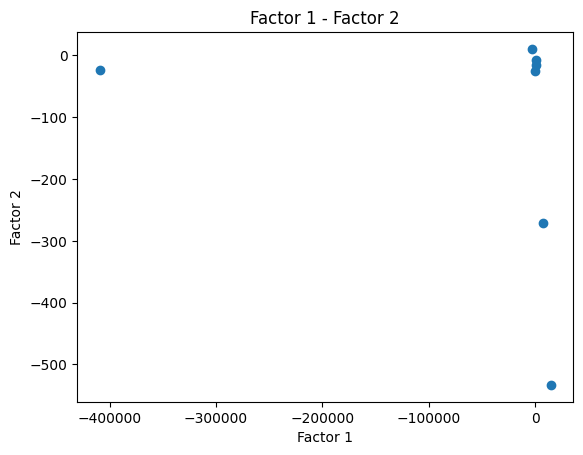

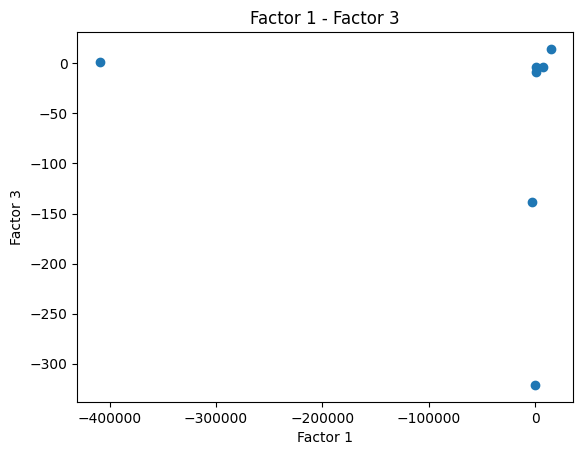

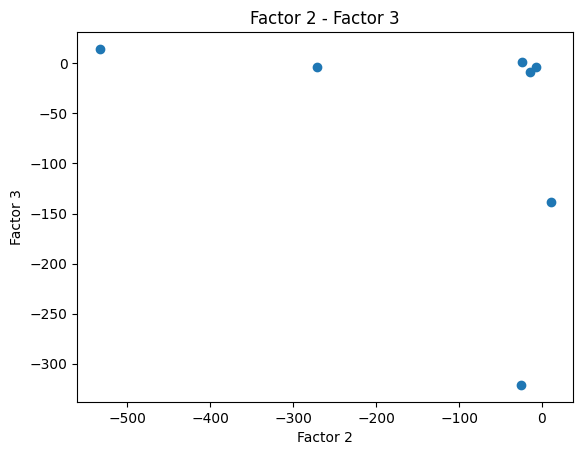

In [28]:
import matplotlib.pyplot as plt


# Комбинация факторов 1-2
factor1 = factor_loadings[:, 0]
factor2 = factor_loadings[:, 1]

plt.scatter(factor1, factor2)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Factor 1 - Factor 2')
plt.show()

# Комбинация факторов 1-3
factor1 = factor_loadings[:, 0]
factor3 = factor_loadings[:, 2]

plt.scatter(factor1, factor3)
plt.xlabel('Factor 1')
plt.ylabel('Factor 3')
plt.title('Factor 1 - Factor 3')
plt.show()

# Комбинация факторов 2-3
factor2 = factor_loadings[:, 1]
factor3 = factor_loadings[:, 2]

plt.scatter(factor2, factor3)
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')
plt.title('Factor 2 - Factor 3')
plt.show()
